In [1]:
from google.colab import files

In [2]:
files.upload()

Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


{'test.csv': b'id,keyword,location,text\n0,,,Just happened a terrible car crash\n2,,,"Heard about #earthquake is different cities, stay safe everyone."\n3,,,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"\n9,,,Apocalypse lighting. #Spokane #wildfires\n11,,,Typhoon Soudelor kills 28 in China and Taiwan\n12,,,We\'re shaking...It\'s an earthquake\n21,,,"They\'d probably still show more life than Arsenal did yesterday, eh? EH?"\n22,,,Hey! How are you?\n27,,,What a nice hat?\n29,,,Fuck off!\n30,,,No I don\'t like cold!\n35,,,NOOOOOOOOO! Don\'t do that!\n42,,,No don\'t tell me that!\n43,,,What if?!\n45,,,Awesome!\n46,ablaze,London,Birmingham Wholesale Market is ablaze BBC News - Fire breaks out at Birmingham\'s Wholesale Market http://t.co/irWqCEZWEU\n47,ablaze,Niall\'s place | SAF 12 SQUAD |,@sunkxssedharry will you wear shorts for race ablaze ?\n51,ablaze,NIGERIA,#PreviouslyOnDoyinTv: Toke Makinwa\xc2\x89\xc3\x9b\xc2\xaas marriage crisis s

## data loading

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv( 'train.csv' )
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [5]:
df.head( 20 )

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


## data info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


##### 33% of location data is missing
##### 0.8% of kewyords is missing

### Tob 15 location

In [7]:
 df['location'].value_counts().head( 15 )

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Australia           18
Chicago, IL         18
Name: location, dtype: int64

### Top 15 keyword 

In [8]:
df['keyword'].value_counts().head( 15 )

fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
outbreak       40
evacuate       40
fear           40
collided       40
siren          40
twister        40
windstorm      40
sinkhole       39
Name: keyword, dtype: int64

## number of data in each class

In [9]:
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

## Data cleaning

In [10]:
import string
import collections
import numpy as np
import re
import nltk
from nltk.stem import PorterStemmer
from itertools import chain



In [11]:
def cleanText(text):

    text = re.sub(r'#[\S]*','',text)                       #remove hashtage 

    text = re.sub(r'@[\S]*','',text)                       #remove mentions 

    text = re.sub(r'https?:\/\/\S+','',text)                 #remove hyperlink 

    text = re.sub(r'\W+',' ',text)                           #remove emotions

    text = re.sub('\d+','',text)                             #remove digits

    text = re.sub(r'^\s+','',text)                           #remove space in front of text 

    text = re.sub(r'\s+$','',text)                           #remove space in tail text

    return text

In [12]:
df['clean_text'] = df[ 'text' ].apply( cleanText )
df[ ['text', 'clean_text'] ]

,text,clean_text
0,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this May ALLAH For...
1,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada
2,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",people receive evacuation orders in California
4,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby as smoke fr...
...,...,...
7608,Two giant cranes holding a bridge collapse int...,Two giant cranes holding a bridge collapse int...
7609,@aria_ahrary @TheTawniest The out of control w...,The out of control wild fires in California ev...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,M UTC km S of Volcano Hawaii
7611,Police investigating after an e-bike collided ...,Police investigating after an e bike collided ...


#### lowering capital letters of text feature

In [13]:
df['clean_text'] = df['clean_text'].apply( lambda x: x.lower())
df[ ['text', 'clean_text'] ]

,text,clean_text
0,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this may allah for...
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,all residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",people receive evacuation orders in california
4,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby as smoke fr...
...,...,...
7608,Two giant cranes holding a bridge collapse int...,two giant cranes holding a bridge collapse int...
7609,@aria_ahrary @TheTawniest The out of control w...,the out of control wild fires in california ev...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,m utc km s of volcano hawaii
7611,Police investigating after an e-bike collided ...,police investigating after an e bike collided ...


#### Tokenization

In [14]:
def tokenization( text ):
  
  tokens = re.split( '\W+', text )
  return tokens

In [15]:
df[ 'clean_text' ] = df[ 'clean_text' ].apply( tokenization )
df[ ['text', 'clean_text'] ]

,text,clean_text
0,Our Deeds are the Reason of this #earthquake M...,"[our, deeds, are, the, reason, of, this, may, ..."
1,Forest fire near La Ronge Sask. Canada,"[forest, fire, near, la, ronge, sask, canada]"
2,All residents asked to 'shelter in place' are ...,"[all, residents, asked, to, shelter, in, place..."
3,"13,000 people receive #wildfires evacuation or...","[people, receive, evacuation, orders, in, cali..."
4,Just got sent this photo from Ruby #Alaska as ...,"[just, got, sent, this, photo, from, ruby, as,..."
...,...,...
7608,Two giant cranes holding a bridge collapse int...,"[two, giant, cranes, holding, a, bridge, colla..."
7609,@aria_ahrary @TheTawniest The out of control w...,"[the, out, of, control, wild, fires, in, calif..."
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,"[m, utc, km, s, of, volcano, hawaii]"
7611,Police investigating after an e-bike collided ...,"[police, investigating, after, an, e, bike, co..."


####  stop words

In [16]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
print( stopwords )

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#### most common stop words

In [18]:
def count_stopwords( text ):

    stopWord = [ i for i in text if i in stopwords ]

    return stopWord



In [19]:
common_stopword = df['clean_text'].apply( count_stopwords )

most_common_stopword = collections.Counter( chain( *common_stopword )).most_common( 5 )

most_common_stopword

[('the', 3276), ('a', 2217), ('in', 1985), ('to', 1949), ('of', 1830)]

#### removing stop words

In [20]:
def remove_stopwords( text ):
    output = [ i for i in text if i not in stopwords ]
    return output

In [21]:
df['clean_text'] = df['clean_text'].apply( remove_stopwords )

In [22]:
df[[ 'text','clean_text' ]]

,text,clean_text
0,Our Deeds are the Reason of this #earthquake M...,"[deeds, reason, may, allah, forgive, us]"
1,Forest fire near La Ronge Sask. Canada,"[forest, fire, near, la, ronge, sask, canada]"
2,All residents asked to 'shelter in place' are ...,"[residents, asked, shelter, place, notified, o..."
3,"13,000 people receive #wildfires evacuation or...","[people, receive, evacuation, orders, california]"
4,Just got sent this photo from Ruby #Alaska as ...,"[got, sent, photo, ruby, smoke, pours, school]"
...,...,...
7608,Two giant cranes holding a bridge collapse int...,"[two, giant, cranes, holding, bridge, collapse..."
7609,@aria_ahrary @TheTawniest The out of control w...,"[control, wild, fires, california, even, north..."
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,"[utc, km, volcano, hawaii]"
7611,Police investigating after an e-bike collided ...,"[police, investigating, e, bike, collided, car..."


#### stem words

In [23]:
from nltk.stem import PorterStemmer

def stem_text( text ):
    
    for word in text:

        ps = PorterStemmer()

        text = [ ps.stem( word ) for word in text ]
        
    return text 

In [24]:
df['clean_text'] = df['clean_text'].apply( stem_text )

df[[ 'text', 'clean_text' ]]

,text,clean_text
0,Our Deeds are the Reason of this #earthquake M...,"[deed, reason, may, allah, forgiv, us]"
1,Forest fire near La Ronge Sask. Canada,"[forest, fire, near, la, rong, sask, canada]"
2,All residents asked to 'shelter in place' are ...,"[resid, ask, shelter, place, notifi, offic, ev..."
3,"13,000 people receive #wildfires evacuation or...","[peopl, receiv, evacu, order, california]"
4,Just got sent this photo from Ruby #Alaska as ...,"[got, sent, photo, rubi, smoke, pour, school]"
...,...,...
7608,Two giant cranes holding a bridge collapse int...,"[two, giant, crane, hold, bridg, collap, nearb..."
7609,@aria_ahrary @TheTawniest The out of control w...,"[control, wild, fire, california, even, northe..."
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,"[utc, km, volcano, hawaii]"
7611,Police investigating after an e-bike collided ...,"[polic, investig, e, bike, collid, car, littl,..."


#### most common words

In [25]:
words = df['clean_text']

most_common_words = collections.Counter( chain( *words )).most_common( 3 )

most_common_words

[('like', 410), ('fire', 357), ('amp', 342)]

### prepare train,val,test sets

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split( df['clean_text'], df['target'], test_size = 0.15, random_state = 22 )
print( x_train.shape )
print( x_val.shape )

(6471,)
(1142,)


In [27]:
test_data = pd.read_csv( 'test.csv' )
x_test = test_data[ 'text' ]
x_test.head( 20 )

0                    Just happened a terrible car crash
1     Heard about #earthquake is different cities, s...
2     there is a forest fire at spot pond, geese are...
3              Apocalypse lighting. #Spokane #wildfires
4         Typhoon Soudelor kills 28 in China and Taiwan
5                    We're shaking...It's an earthquake
6     They'd probably still show more life than Arse...
7                                     Hey! How are you?
8                                      What a nice hat?
9                                             Fuck off!
10                                No I don't like cold!
11                           NOOOOOOOOO! Don't do that!
12                               No don't tell me that!
13                                            What if?!
14                                             Awesome!
15    Birmingham Wholesale Market is ablaze BBC News...
16    @sunkxssedharry will you wear shorts for race ...
17    #PreviouslyOnDoyinTv: Toke MakinwaÛªs mar

### Tokenization

In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

toknizer = Tokenizer( num_words = 20000 )

toknizer.fit_on_texts( x_train )

train_sequnces = toknizer.texts_to_sequences( x_train )

print(train_sequnces)

[[68, 914, 286, 77, 368, 10, 12, 607, 169, 63, 1109, 110], [453, 1423, 3100], [435, 4362, 859, 244, 2491, 589, 244, 269, 589, 259], [1, 14, 651, 1617, 304], [2092, 4363, 860, 124, 3101, 1110, 4364, 565, 208], [219, 4365, 3102, 2093, 413, 4366, 608, 762, 287, 78, 3103, 521, 92], [170, 4367, 1111, 305, 3104, 3105, 27, 4368, 395, 3106, 352, 4369, 652, 1424, 1047, 120, 4370, 436, 352, 861], [2094, 1823, 1425, 1426, 437, 321, 121, 976, 763, 16, 1427, 21, 116, 802], [174, 496, 61, 68, 1618, 1048], [653, 590, 609, 497, 220, 306, 414], [4371, 3107, 977, 28, 93, 336, 1049, 4372, 4373, 4374, 454], [221, 73, 764, 288, 978], [103, 289], [58, 3, 2, 1619, 979, 33], [56, 396, 175, 38, 521, 1428, 29, 3108], [455, 2095, 1824, 609], [219, 1825, 1294, 4375, 117, 307, 415, 322, 1294, 3, 915, 252, 2096, 2097, 4376, 337, 1050], [654, 1429, 2098, 1051, 4377, 610, 176, 765], [114, 862, 2099, 36, 69, 766, 2100, 232, 107, 3, 2101, 683], [369, 655, 260, 187, 260], [41, 14, 4378, 4379, 1620, 2102, 199, 245, 4380,

### pad sequence

In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_padded_sequence = pad_sequences( train_sequnces,truncating ='post', maxlen = 20 )

train_padded_sequence

array([[   0,    0,    0, ...,   63, 1109,  110],
       [   0,    0,    0, ...,  453, 1423, 3100],
       [   0,    0,    0, ...,  269,  589,  259],
       ...,
       [   0,    0,    0, ...,   80, 1996,  334],
       [   0,    0,    0, ..., 2464, 9146,    4],
       [   0,    0,    0, ...,  198,   15,  210]], dtype=int32)

In [30]:
val_sequnces = toknizer.texts_to_sequences( x_val )
test_sequnces = toknizer.texts_to_sequences( x_test )

print( val_sequnces )
print( test_sequnces )

[[124, 47, 342, 136, 78, 125, 4172, 1991, 8263, 616, 3105, 1791], [789, 1729, 888, 652, 267, 28, 43, 7, 957, 90, 475], [467, 693, 2341, 111, 3147], [4223, 3844, 148, 941, 4055, 4223, 3844, 148, 941, 4055, 1756], [129, 979, 1617, 246, 1762, 16, 83, 47, 1578, 273, 380], [16, 83, 185, 7, 117, 434], [741, 3011, 319, 963, 742, 152, 2, 557, 274, 388], [575], [54], [216, 345, 117], [3843, 217, 251, 793, 907, 522, 1603, 33], [5229, 418, 2789, 246, 254, 358, 23, 191, 554, 1171, 1879, 203, 20], [30, 435, 260, 8667], [1480, 2, 224, 1513, 2481, 485, 819, 2497, 164], [188, 35, 51, 1831, 977, 77, 1054, 1197, 3813], [158, 6, 726, 163, 34, 97, 48, 525, 1518, 458, 28, 198, 261, 639], [177, 42, 4246, 267, 42, 2097, 2006, 315, 1478, 130, 134, 99, 721], [124, 346, 129, 1011, 185, 7, 42, 1096, 79], [53, 641, 199, 245, 99, 642, 584, 393], [659, 477, 1713, 6849, 19, 107], [79, 34, 4299, 1501, 880, 2647, 141, 2164, 44, 40, 488], [216, 117, 6086], [980, 97, 287, 683, 114, 2918, 265], [5, 7021, 2705, 595, 491],

In [31]:
val_padded_sequence = pad_sequences( val_sequnces, truncating = 'post', maxlen = 20 )

test_padded_sequence = pad_sequences( test_sequnces, truncating = 'post', maxlen = 20 )


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,LSTM,Embedding ,GlobalAveragePooling1D,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint


model = Sequential()

model.add( Embedding( 20000 , 64, input_length = 20 ))

model.add( LSTM( 32, return_sequences = True ))
model.add( Dropout( 0.4 ))

model.add( LSTM( 16, return_sequences = True ))
model.add( Dropout( 0.3 ))

model.add( LSTM( 8 ))
model.add( Dropout( 0.4 ))

model.add( Dense( 1, activation = 'sigmoid' ))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 64)            1280000   
                                                                 
 lstm (LSTM)                 (None, 20, 32)            12416     
                                                                 
 dropout (Dropout)           (None, 20, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20, 16)            3136      
                                                                 
 dropout_1 (Dropout)         (None, 20, 16)            0         
                                                                 
 lstm_2 (LSTM)               (None, 8)                 800       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0

In [33]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('checkpoint.h5', monitor = 'val_accuracy', save_best_only = True)

model.compile( 'adam', 'binary_crossentropy', metrics = ['accuracy'] )

history = model.fit( train_padded_sequence, y_train, batch_size = 128, epochs = 10, validation_data = ( val_padded_sequence, y_val ), callbacks = [model_checkpoint_callback] )

Epoch 1/10
51/51 [==============================] - 10s 55ms/step - loss: 0.6740 - accuracy: 0.5736 - val_loss: 0.6334 - val_accuracy: 0.6585
Epoch 2/10
51/51 [==============================] - 1s 24ms/step - loss: 0.5352 - accuracy: 0.7741 - val_loss: 0.5058 - val_accuracy: 0.7697
Epoch 3/10
51/51 [==============================] - 1s 24ms/step - loss: 0.3699 - accuracy: 0.8659 - val_loss: 0.5087 - val_accuracy: 0.7750
Epoch 4/10
51/51 [==============================] - 1s 22ms/step - loss: 0.2897 - accuracy: 0.9062 - val_loss: 0.5452 - val_accuracy: 0.7715
Epoch 5/10
51/51 [==============================] - 1s 22ms/step - loss: 0.2393 - accuracy: 0.9278 - val_loss: 0.6066 - val_accuracy: 0.7548
Epoch 6/10
51/51 [==============================] - 1s 24ms/step - loss: 0.2018 - accuracy: 0.9403 - val_loss: 0.6301 - val_accuracy: 0.7662
Epoch 7/10
51/51 [==============================] - 1s 22ms/step - loss: 0.1793 - accuracy: 0.9484 - val_loss: 0.7095 - val_accuracy: 0.7601
Epoch 8/10
5

### chart of accuracy and loss

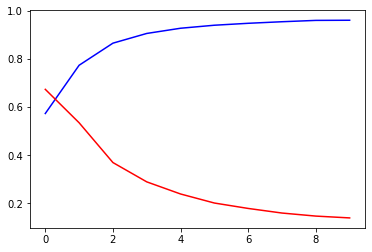

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot( history.history['accuracy'], 'b' )
plt.plot( history.history['loss'], 'r' )

### making predictions

In [35]:
predictions = model.predict( test_padded_sequence )
predictions = predictions.round()
predictions[ :20 ]

array([[0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

### saving the model

In [36]:
model.save('model.h5')